In [1]:
default_options <- options()

In [ ]:
extrafont::loadfonts()

In [3]:
theme_set(ggpubr::theme_pubclean(base_size = 11, base_family = 'Open Sans'))
theme_update(panel.grid.major.y = element_line(linetype = 3, size = .3),
             legend.key = element_rect(fill = 'white'),
             axis.title.y = element_text(margin = margin(r = 5)))

In [4]:
scale_color_sex <- function(...) {
    scale_color_manual(values = c('#F05C3B', '#709AE1'), labels = c("Женщины", "Мужчины"),  ...)
}

# Только Россия

In [ ]:
rus <- read_csv('Russia.csv') %>%
    filter(age == '<1 year')

Сверимся с результатами [IHME](http://www.healthdata.org/russia).

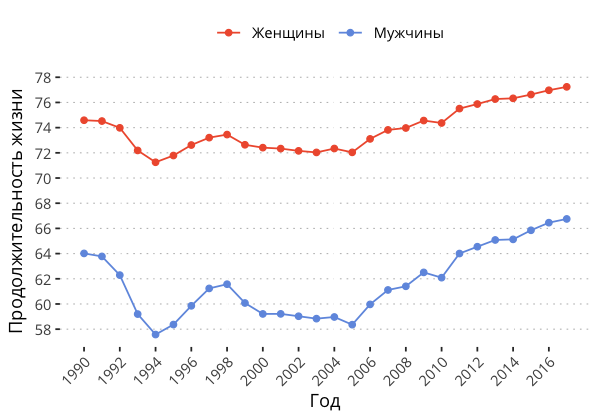

In [6]:
rus %>%
    filter(sex != 'Both') %>%
    ggplot(aes(year, val, color = sex)) +
    geom_line() +
    geom_point() +
    scale_y_continuous(breaks = seq(58,78,2)) +
    scale_x_continuous(breaks = seq(1990,2016,2)) +
    scale_color_sex() +
    labs(y = "Продолжительность жизни", x = "Год", color = NULL) +
    theme(panel.grid.minor = element_blank(), legend.position = 'top', axis.text.x = element_text(angle = 45, hjust = 1))

# Некоторые страны

In [ ]:
countries <- read_csv('Countries.csv')

In [8]:
special_countries <- c(
    "Russian Federation",
    "Ukraine",
    "Belarus",
    "Latvia",
    "Lithuania",
    "Estonia",
    "Finland",
    "Sweden",
    "Norway",
    "Poland",
    "Slovakia",
    "Slovenia",
    "Czech Republic",
    "Hungary",
    "Serbia",
    "Croatia",
    "Austria",
    "Germany",
    "Italy",
    "Switzerland",
    "France",
    "Netherlands",
    "Belgium",
    "United Kingdom",
    "Spain",
    "Portugal",
    "Greece",
    "Turkey",
    "Iran",
    "Israel",
    "Saudi Arabia",
    "United Arab Emirates",
    "Egypt",
    "South Africa",
    "United States",
    "Canada",
    "Brazil",
    "Argentina",
    "China",
    "India",
    "Japan",
    "Australia",
    "Thailand")

In [9]:
special_countries <- countries %>%
    filter(location %in% special_countries)

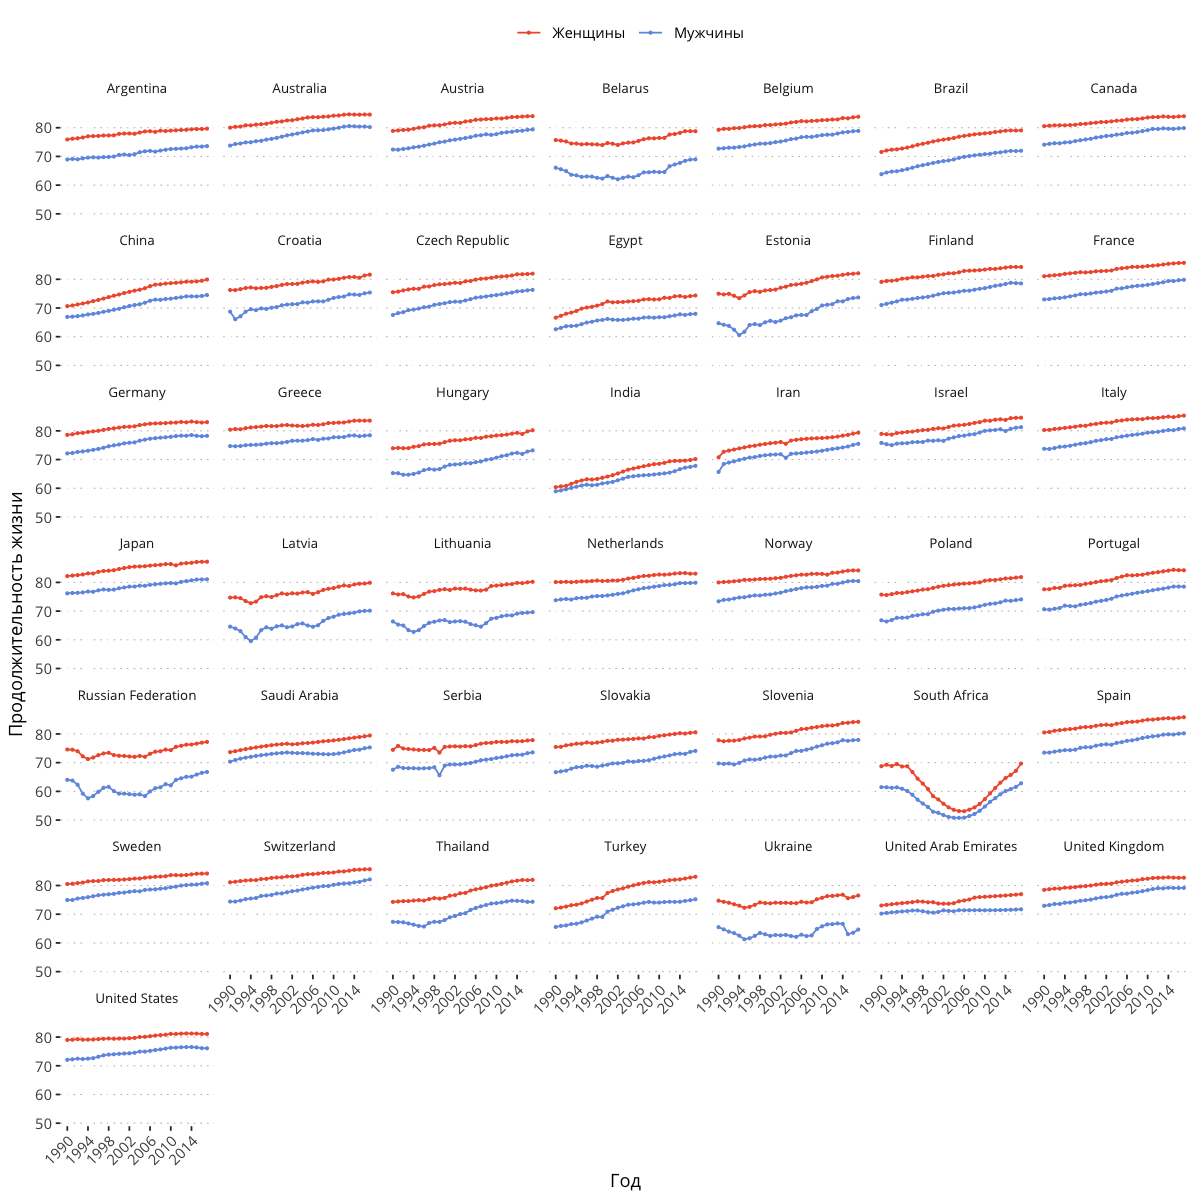

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)

special_countries %>%
    filter(sex != 'Both') %>%
    ggplot(aes(year, val, color = sex)) +
    geom_line() +
    geom_point(size = .5) +
    # scale_y_continuous(breaks = seq(58,80,2)) +
    scale_x_continuous(breaks = seq(1990,2016,4)) +
    scale_color_sex() +
    labs(y = "Продолжительность жизни", x = "Год", color = NULL) +
    facet_wrap(~ location) +
    theme(legend.position = 'top',
          strip.background = element_rect(fill = 'white'), strip.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))

In [11]:
highlight_countries <- c('Russian Federation', 'Belarus', 'United States', 'Germany', 'Netherlands', 'Sweden', 'Saudi Arabia')
names(highlight_countries) <- highlight_countries

In [12]:
highlight_countries_plots <- map(highlight_countries, function(c) {
    country <- special_countries %>%
        filter(location == c)
    country_2017_min <- country %>%
        filter(year == 2017) %$%
        min(val)
    country_2017_delta <- country %>%
        filter(sex != 'Both', year == 2017) %$%
        diff(val)
    country_2017_middle <- country_2017_min + country_2017_delta / 2
    country %>%
        filter(sex != 'Both') %>%
        ggplot(aes(year, val, color = sex)) +
        geom_line() +
        geom_point() +
        annotate(geom = 'label',
                 x = 2017 - 2,
                 y = country_2017_middle,
                 label = sprintf("%.1f л", country_2017_delta),
                 size = 2 * log(country_2017_delta)) +
        guides(color = F) +
        scale_y_continuous(breaks = seq(58,90,4), lim = c(57,85), expand = c(.025,0,0,0)) +
        scale_x_continuous(breaks = seq(1990,2016,2)) +
        scale_color_sex() +
        labs(y = "Продолжительность жизни", x = "Год", title = c, color = NULL) +
        theme(panel.grid.minor = element_line(size = .1), axis.text.x = element_text(angle = 45, hjust = 1))
})

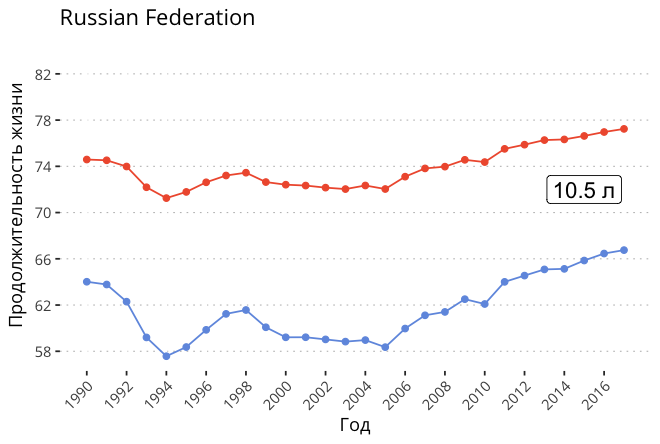

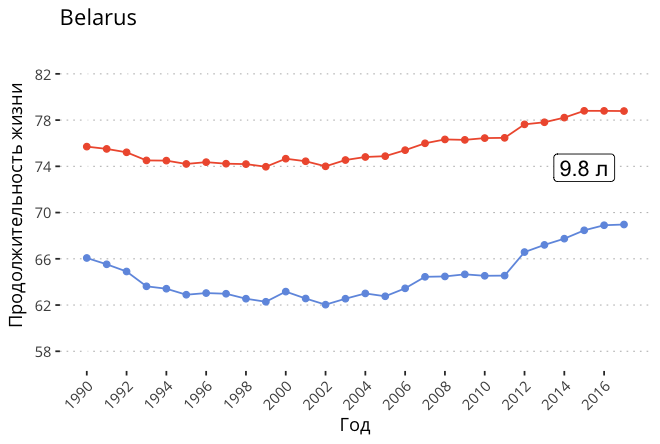

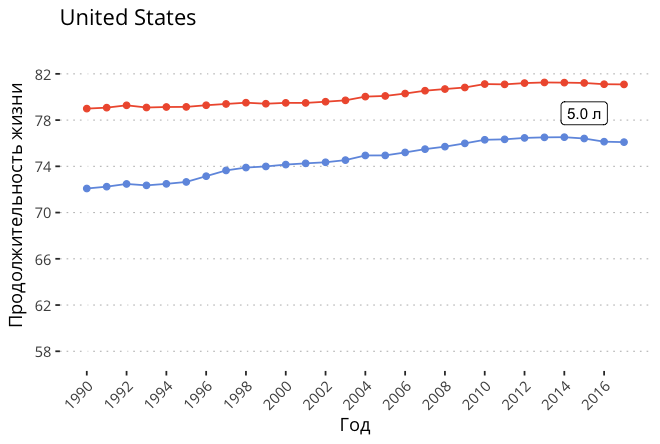

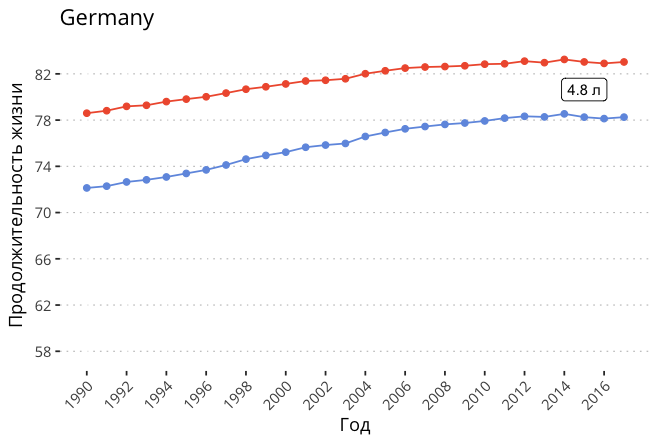

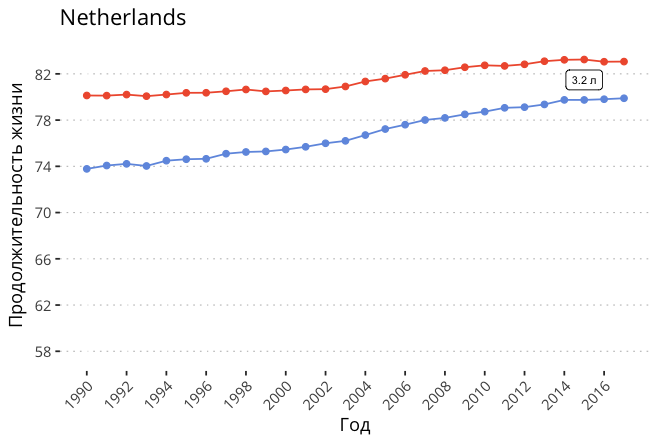

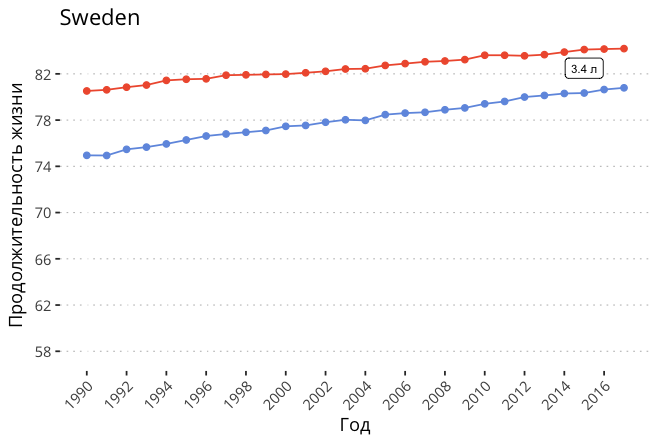

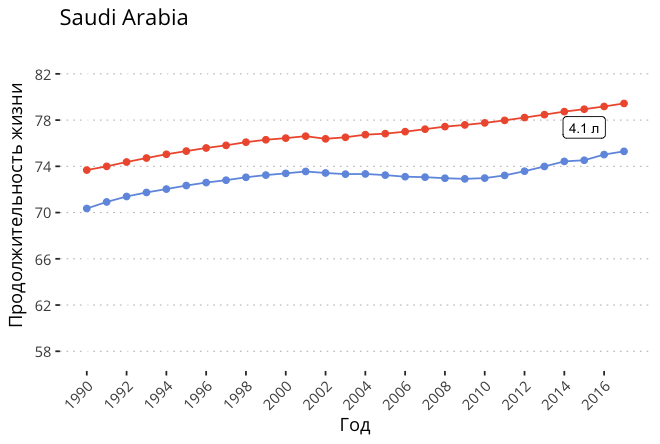

In [13]:
options(repr.plot.width = 5.5, repr.plot.height = 3.7)

walk(highlight_countries_plots, plot)

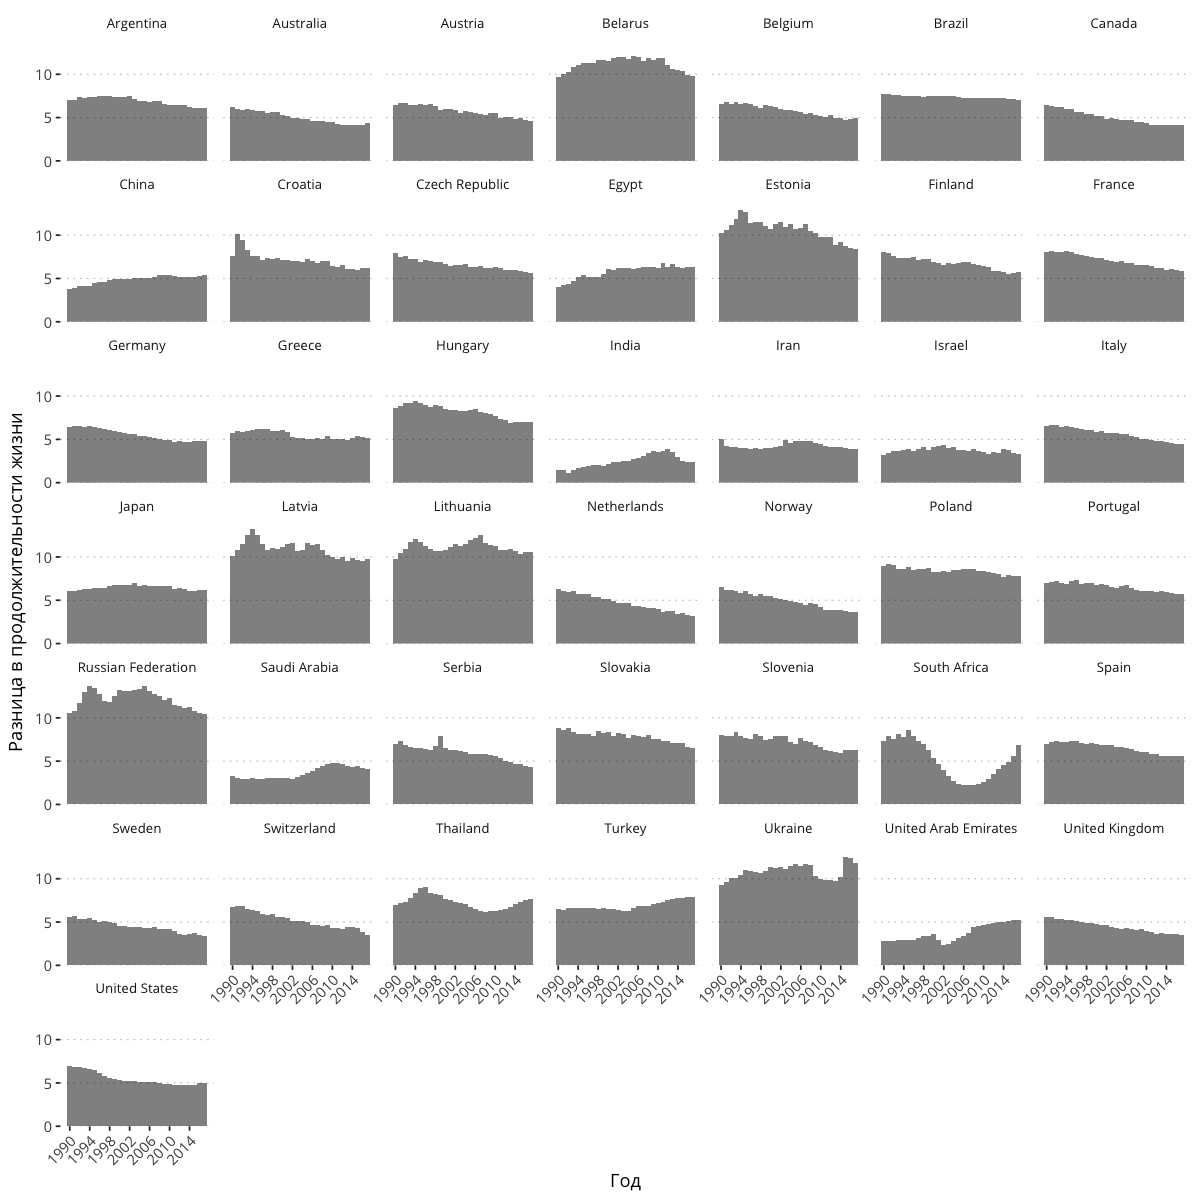

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)

special_countries %>%
    filter(sex != 'Both') %>%
    group_by(location, year) %>%
    summarise(delta = diff(val)) %>%
    ggplot(aes(year, delta)) +
    geom_bar(stat = 'identity', width = 1, fill = 'black', alpha = .5) +
    scale_y_continuous(expand = c(0,0,.05,0)) +
    scale_x_continuous(breaks = seq(1990,2016,4)) +
    facet_wrap(~ location) +
    labs(y = "Разница в продолжительности жизни", x = "Год") +
    theme(legend.position = 'top',
          strip.background = element_rect(fill = 'white'), strip.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))

# Модель

In [15]:
fit_data <- special_countries %>%
    filter(sex != 'Both', year == 2017)
lm(val ~ sex, fit_data)


Call:
lm(formula = val ~ sex, data = fit_data)

Coefficients:
(Intercept)      sexMale  
     81.345       -5.925  


Для гомогенности, будем использовать только страны Европы.

In [ ]:
europe_countries <- read_csv('Europe Countries.csv')

In [17]:
western_europe_countries <- c(
    'Andorra',
    'Austria',
    'Belgium',
    'Cyprus',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Luxembourg',
    'Malta',
    'Netherlands',
    'Norway',
    'Portugal',
    'Spain',
    'Sweden',
    'Switzerland',
    'United Kingdom'
)
central_europe_countries <- c(
    'Albania',
    'Bosnia and Herzegovina',
    'Bulgaria',
    'Croatia',
    'Czech Republic',
    'Hungary',
    'Macedonia',
    'Montenegro',
    'Poland',
    'Romania',
    'Serbia',
    'Slovakia',
    'Slovenia'
)
eastern_europe_countries <- c(
    'Belarus',
    'Estonia',
    'Latvia',
    'Lithuania',
    'Moldova',
    'Russian Federation',
    'Ukraine'
)

In [18]:
europe_countries %<>%
    mutate(region = case_when(location %in% western_europe_countries ~ "Western",
                              location %in% central_europe_countries ~ "Central",
                              location %in% eastern_europe_countries ~ "Eastern"),
           region = factor(region, c("Western", "Central", "Eastern")))


Call:
lm(formula = val ~ sex, data = fit_data)

Coefficients:
(Intercept)      sexMale  
     82.165       -5.973  



Call:
lm(formula = val ~ sex + region, data = fit_data)

Coefficients:
  (Intercept)        sexMale  regionCentral  regionEastern  
       84.951         -5.973         -4.640         -8.095  



Call:
lm(formula = val ~ sex + region + sex:region, data = fit_data)

Coefficients:
          (Intercept)                sexMale          regionCentral  
               84.233                 -4.538                 -3.796  
        regionEastern  sexMale:regionCentral  sexMale:regionEastern  
               -5.356                 -1.688                 -5.478  


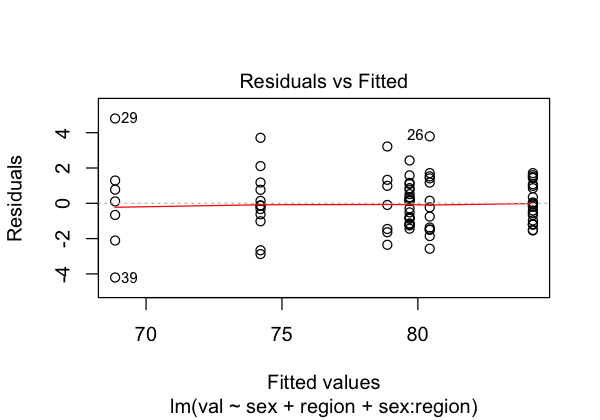

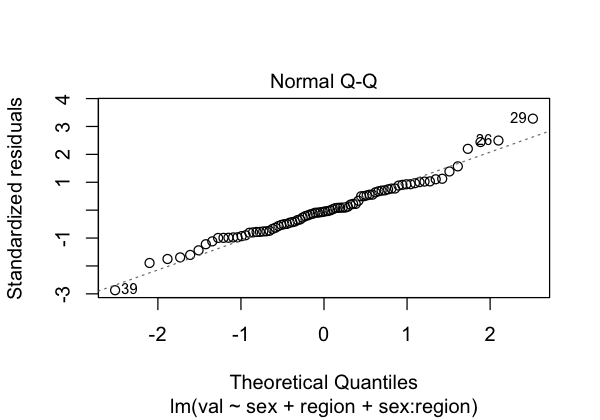

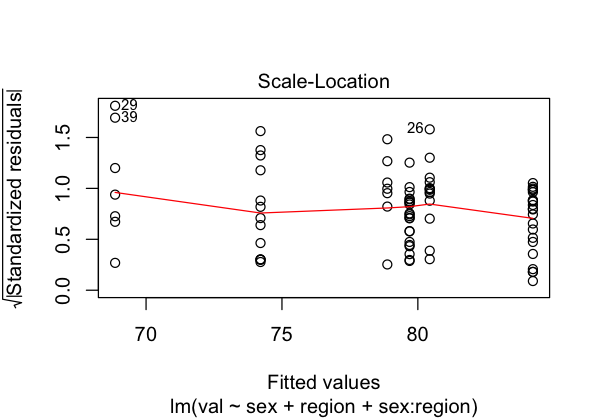

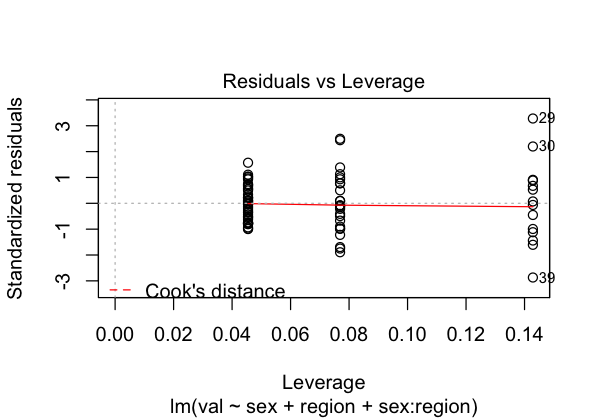

In [19]:
options(repr.plot.width = default_options$repr.plot.width,
        repr.plot.height = default_options$repr.plot.height)

fit_data <- europe_countries %>%
    filter(sex != 'Both', year == 2017)
fit <- lm(val ~ sex, fit_data)
fit
fit <- update(fit, ~ . + region)
fit
fit <- update(fit, ~ . + region + sex * region)
fit

plot(fit)

In [20]:
fit_data[c(26,29,39),]

measure,location,sex,age,metric,year,val,upper,lower,region
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Life expectancy,Slovenia,Female,<1 year,Years,2017,84.23101,84.98516,83.45326,Central
Life expectancy,Estonia,Male,<1 year,Years,2017,73.66604,75.29191,71.96733,Eastern
Life expectancy,Ukraine,Male,<1 year,Years,2017,64.65704,65.43924,63.86522,Eastern


In [ ]:
europe_regions <- read_csv('Europe Regions.csv')

In [22]:
europe_regions %>%
    filter(sex != 'Both', year == 2017) %>%
    select(location, sex, val) %>%
    mutate(val = round(val, 1))

location,sex,val
<chr>,<chr>,<dbl>
Central Europe,Male,73.6
Central Europe,Female,80.4
Eastern Europe,Male,66.5
Eastern Europe,Female,77.2
Western Europe,Male,79.5
Western Europe,Female,84.2


# Мужчины vs Женщины

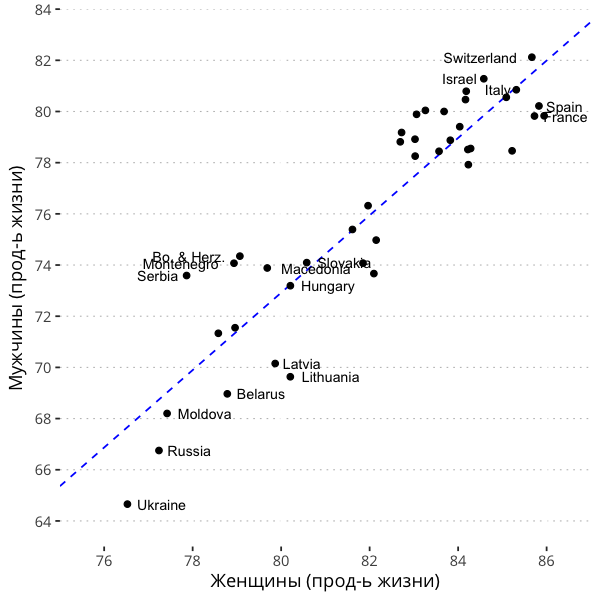

In [23]:
options(repr.plot.width = 5, repr.plot.height = 5)

plt_data <- europe_countries %>%
    filter(year == 2017) %>%
    filter(sex != 'Both') %>%
    select(-upper, -lower) %>%
    spread(sex, val)
plt_labels <- plt_data %>%
    filter(location %in% c('Russian Federation', 'Ukraine', 'Belarus', 'Latvia', 'Lithuania', 'Moldova', 'Israel', 'Switzerland',
                           'Serbia', 'Slovakia', 'Hungary', 'Montenegro', 'Bosnia and Herzegovina', 'Macedonia',
                           'France', 'Italy', 'Spain')) %>%
    mutate(location = recode(location, 'Russian Federation' = 'Russia', 'Bosnia and Herzegovina' = 'Bo. & Herz.')) %>%
    mutate(hjust = if_else(Female - Male < 5, 1.2, -.2))

ggplot(plt_data, aes(Female, Male)) +
    geom_smooth(method = 'lm', se = F, fullrange = T, color = 'blue', lty = 2, size = .5) +
    geom_point() +
    geom_text(data = plt_labels, aes(label = location), size = 3, hjust = plt_labels$hjust) +
    scale_x_continuous(lim = c(75,87), breaks = seq(0,100,2), expand = c(0,0)) +
    scale_y_continuous(lim = c(63,84), breaks = seq(0,100,2), expand = c(0,0)) +
    labs(y = "Мужчины (прод-ь жизни)", x = "Женщины (прод-ь жизни)") +
    theme(panel.grid.minor = element_blank())

# Карта Европы

In [24]:
worldMap <- rworldmap::getMap()

In [ ]:
unique(europe_countries$location) %>% extract(. %nin% worldMap$NAME)
sort(worldMap$NAME)

In [26]:
map_data <- europe_countries %>%
    mutate(location = recode(location,
                             'Bosnia and Herzegovina' = 'Bosnia and Herz.',
                             'Czech Republic' = 'Czech Rep.',
                             'Russian Federation' = 'Russia'))

In [27]:
indMap <- which(worldMap$NAME %in% map_data$location)
coords <- lapply(indMap, function(i){
  df <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  df$region <- as.character(worldMap$NAME[i])
  colnames(df) <- list("long", "lat", "region")
  return(df)
})

coords <- do.call("rbind", coords)

In [28]:
map_data %<>%
    filter(sex != 'Both', year == 2017) %>%
    group_by(location) %>%
    summarise(delta = diff(val)) %>%
    right_join(coords, by = c('location' = 'region'))

In [29]:
map_labels_countries <- c("Russia", "Ukraine", "Belarus", "Poland", "Romania", "Norway", "Germany", "France", "Spain", "Italy", "United Kingdom", "Finland", "Sweden")
map_labels <- map_data %>%
    group_by(location) %>%
    summarise(long = mean(range(long)), lat = mean(range(lat)),
              delta = unique(delta),
              label = sprintf("%.1f", delta)) %>%
    filter(location %in% map_labels_countries)

In [30]:
map_labels[map_labels$location == 'United Kingdom', c('lat', 'long')] <- c(52.5,-1.5)
map_labels[map_labels$location == 'Ukraine', c('lat', 'long')] <- c(49.5,32)
map_labels[map_labels$location == 'Finland', c('lat', 'long')] <- c(62.5,26)
map_labels[map_labels$location == 'Norway', c('lat', 'long')] <- c(61,9)
map_labels[map_labels$location == 'Sweden', c('lat', 'long')] <- c(59.5,14.5)
map_labels[map_labels$location == 'Russia', c('lat', 'long')] <- c(56,38)

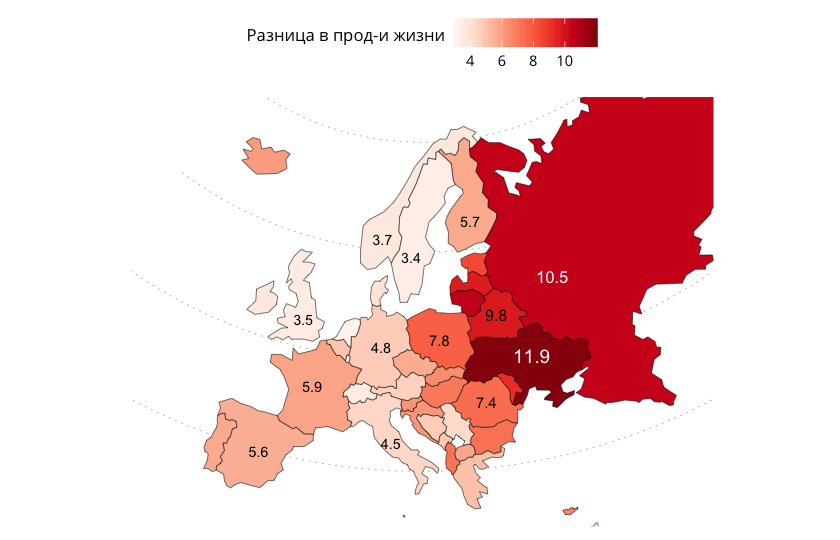

In [31]:
options(repr.plot.width = 7, repr.plot.height = 4.5)

ggplot(map_data, aes(long, lat, group = location, fill = delta)) +
    geom_polygon(color = "black", size = .15) +
    geom_text(data = map_labels, aes(label = label, color = delta, size = exp(delta))) +
    coord_map(projection = "bonne", lat0 = 52, xlim = c(-17, 50), ylim = c(35,72), clip = 'on') +
    scale_fill_gradientn(colors = RColorBrewer::brewer.pal(n = 8, name = 'Reds')) +
    scale_color_gradientn(colors = c(rep('black', 35), rep('white',9)), guide = F) +
    scale_size_continuous(range = c(3,4), guide = F) +
    labs(fill = "Разница в прод-и жизни", x = NULL, y = NULL) +
    theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(),
          panel.border = element_blank(),
          legend.position = 'top', legend.title = element_text(size = 10, vjust = 3/4))

# Регионы России

In [ ]:
rus_regions <- read_excel('Russia Regions.xlsx', range = 'A2:AA332')

In [33]:
rus_regions %<>%
    select(-2) %>%
    rename(label = 1)

In [34]:
rus_regions %<>% extract(apply(., 1, function(r) sum(is.na(r))) != ncol(.) - 1,)

In [35]:
rus_regions %<>% mutate(sex = rep(c('Both', 'Female', 'Male'), each = 108))

In [36]:
rus_regions %<>%
    gather(year, val, -label, -sex) %>%
    mutate(year = str_replace(year, ' г.', ''),
           year = parse_integer(year))

Цифры совпадают с цифрами от IHME (вообще они используют данные Росстата).

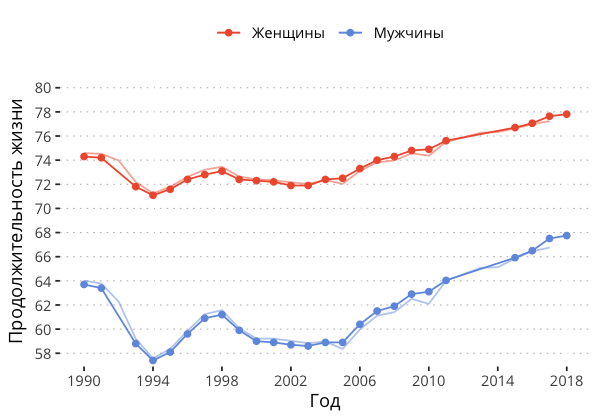

In [37]:
options(repr.plot.width = default_options$repr.plot.width,
        repr.plot.height = default_options$repr.plot.height)

rus_regions %>%
    filter(label == 'Российская Федерация') %>%
    filter(sex != 'Both') %>%
    ggplot(aes(year, val, color = sex)) +
    geom_line() +
    geom_point() +
    geom_line(data = filter(rus, sex != 'Both'), alpha = .5) +
    scale_y_continuous(breaks = seq(58,80,2)) +
    scale_x_continuous(breaks = seq(1990,2018,4)) +
    scale_color_sex() +
    coord_cartesian(ylim = c(58,80)) +
    labs(y = "Продолжительность жизни", x = "Год", color = NULL) +
    theme(panel.grid.minor = element_blank(), legend.position = 'top')

Загружаем (из сети) и сглаживаем карту России (может занять какое-то время).

In [38]:
rus_map <- raster::getData('GADM', country = 'RUS', level = 1)
rus_map_sim <- rgeos::gSimplify(rus_map, tol = .1, topologyPreserve = T)

In [39]:
rus_map <- rus_map@data %>%
    mutate(id = rownames(.)) %>%
    right_join(fortify(rus_map_sim), by = 'id')

Сопоставляем названия регионов.

In [40]:
rus_map[rus_map$NAME_1 == 'Moscow City', 'NL_NAME_1'] <- "Москва"

In [41]:
exclude_regions <- c(
    'Российская Федерация',
    'Центральный федеральный округ',
    'Северо-Западный федеральный округ',
    'Южный федеральный округ (с 29.07.2016)',
    'Северо-Кавказский федеральный округ',
    'Приволжский федеральный округ',
    'Уральский федеральный округ',
    'Сибирский федеральный округ',
    'Дальневосточный федеральный округ',
    'Центральный федеральный округ',
    'Архангельская область', # есть по отдельности
    'Тюменская область' # есть по отдельности
)
rus_regions_mapping <- c(
    'Город Москва столица Российской Федерации город федерального значения' = 'Москва',
    'Ненецкий автономный округ (Архангельская область)' = 'Ненецкий АОк',
    'Архангельская область (кроме Ненецкого автономного округа)' = 'Архангельская область',
    'Город Санкт-Петербург город федерального значения' = 'Санкт-Петербург (горсовет)',
    'Республика Адыгея (Адыгея)' = 'Республика Адыгея',
    'Республика Ингушетия*' = 'Респу́блика Ингуше́тия',
    'Республика Крым' = NA, # нет на карте
    'Город федерального значения Севастополь' = NA, # нет на карте
    'Карачаево-Черкесская Республика' = 'Карачаево-Черкессия Республика',
    'Чеченская Республика*' = 'Республика Чечено-Ингушская',
    'Республика Татарстан (Татарстан)' = 'Республика Татарстан',
    'Чувашская Республика - Чувашия' = 'Чувашская Республика',
    'Пермский край' = 'Пермская край',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)' = 'Ханты-Мансийский АОк',
    'Ямало-Ненецкий автономный округ (Тюменская область)' = 'Ямало-Ненецкий АОк',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)' = 'Тюменская область',
    'Кемеровская область - Кузбасс' = 'Кемеровская область',
    'Республика Саха (Якутия)' = 'Республика Саха',
    'Камчатский край' = 'Камчатская край',
    'Еврейская автономная область' = 'Eврейская АОб',
    'Чукотский автономный округ' = 'Чукотский АОк'
)

In [42]:
map_data <- rus_regions %>%
    filter(year == 2017, !is.na(val)) %>%
    filter(label %nin% exclude_regions) %>%
    mutate(label = if_else(label %in% names(rus_regions_mapping), rus_regions_mapping[label] , label)) %>%
    filter(!is.na(label))

In [43]:
map_data %<>%
    filter(sex != 'Both') %>%
    group_by(label) %>%
    summarise(delta = diff(rev(val)))

In [44]:
map_data %<>%
    right_join(rus_map, by = c('label' = 'NL_NAME_1'))

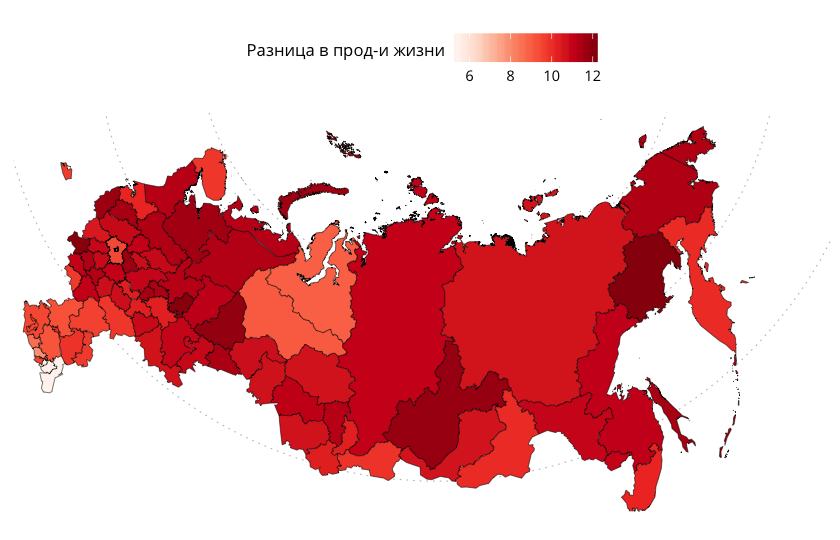

In [45]:
options(repr.plot.width = 7, repr.plot.height = 4.5)

ggplot(map_data, aes(long, lat, group = group, fill = delta)) +
    geom_polygon(color = "black", size = .15) +
    coord_map(projection = "albers", parameters = c(52, 64), orientation = c(90,105,0), xlim = c(29, 172), ylim = c(47, 78)) +
    scale_fill_gradientn(colors = RColorBrewer::brewer.pal(n = 8, name = 'Reds')) +
#     scale_color_gradientn(colors = c(rep('black', 35), rep('white',9)), guide = F) +
#     scale_size_continuous(range = c(3,4), guide = F) +
    labs(fill = "Разница в прод-и жизни", x = NULL, y = NULL) +
    theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(),
          panel.border = element_blank(), panel.grid = element_line(size = .1),
          legend.position = 'top', legend.title = element_text(size = 10, vjust = 3/4))

In [46]:
fit_data <- rus_regions %>%
    filter(year == 2017, !is.na(val)) %>%
    filter(sex != 'Both') %>%
    filter(label %nin% exclude_regions)

In [47]:
fit <- lm(val ~ sex, fit_data)
summary(fit)


Call:
lm(formula = val ~ sex, data = fit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4666 -1.2028 -0.1490  0.9897 11.7834 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.1614     0.2504  308.15   <2e-16 ***
sexMale     -10.3648     0.3541  -29.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 168 degrees of freedom
Multiple R-squared:  0.836,	Adjusted R-squared:  0.8351 
F-statistic: 856.7 on 1 and 168 DF,  p-value: < 2.2e-16


Такие же результаты, как и при анализе Европы.

In [48]:
fit_data %<>%
    group_by(label) %>%
    summarise(delta = diff(rev(val))) %>%
    arrange(delta)

In [49]:
head(fit_data, 10)
tail(fit_data, 10)

label,delta
<chr>,<dbl>
Республика Дагестан,5.40
Республика Ингушетия*,5.48
Чеченская Республика*,5.50
Город Москва столица Российской Федерации город федерального значения,6.72
Кабардино-Балкарская Республика,7.86
Город Санкт-Петербург город федерального значения,8.40
Карачаево-Черкесская Республика,8.62
Ямало-Ненецкий автономный округ (Тюменская область),8.95
Ханты-Мансийский автономный округ - Югра (Тюменская область),9.05


label,delta
<chr>,<dbl>
Новгородская область,11.48
Сахалинская область,11.50
Архангельская область (кроме Ненецкого автономного округа),11.58
Владимирская область,11.62
Псковская область,11.71
Иркутская область,11.76
Свердловская область,11.81
Брянская область,12.00
Удмуртская Республика,12.02


См. как быстро мы приближаемся к этим 10 годам, меньше всего пара регионов.

[1] 10.36482

[1] 1.341568

[1] -1.98605

[1] 4.613692

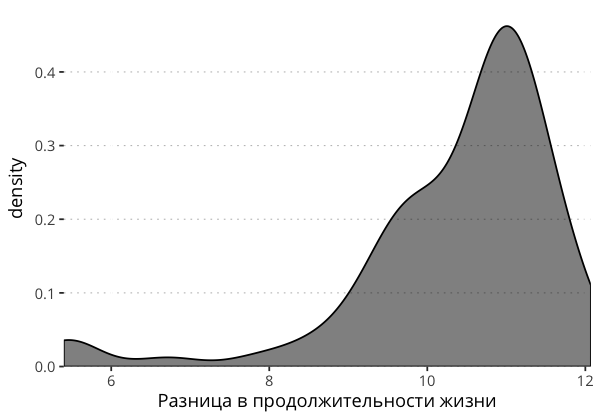

In [50]:
options(repr.plot.width = default_options$repr.plot.width,
        repr.plot.height = default_options$repr.plot.height)

ggplot(fit_data, aes(delta)) +
    geom_density(fill = 'black', alpha = .5) +
    scale_y_continuous(expand = c(0,0,.05,0)) +
    scale_x_continuous(expand = c(0,0)) +
    labs(x = "Разница в продолжительности жизни")

mean(fit_data$delta)
sd(fit_data$delta)
moments::skewness(fit_data$delta)
moments::kurtosis(fit_data$delta) - 3

СКО по отношению к среднему низкий. Отрицательный skewness и большой kurtosis.

Очевидно экстремальные значения это ниже 8. Выделим их при помощи 1.5 IQR.

In [51]:
fit_data %<>%
    mutate(q1 = quantile(delta, .25),
           me = quantile(delta, .5),
           q3 = quantile(delta, .75),
           iqr = q3 - q1,
           top = q3 + 1.5 * iqr,
           bot = q1 - 1.5 * iqr)

In [52]:
filter(fit_data, delta < bot | delta > top)

label,delta,q1,me,q3,iqr,top,bot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Республика Дагестан,5.40,9.81,10.8,11.22,1.41,13.335,7.695
Республика Ингушетия*,5.48,9.81,10.8,11.22,1.41,13.335,7.695
Чеченская Республика*,5.50,9.81,10.8,11.22,1.41,13.335,7.695
Город Москва столица Российской Федерации город федерального значения,6.72,9.81,10.8,11.22,1.41,13.335,7.695


По распределению видно 3 кластера. Можно это же число определить через WSS.

In [53]:
wss <- map_dbl(1:10, ~ kmeans(fit_data$delta, .)$tot.withinss)

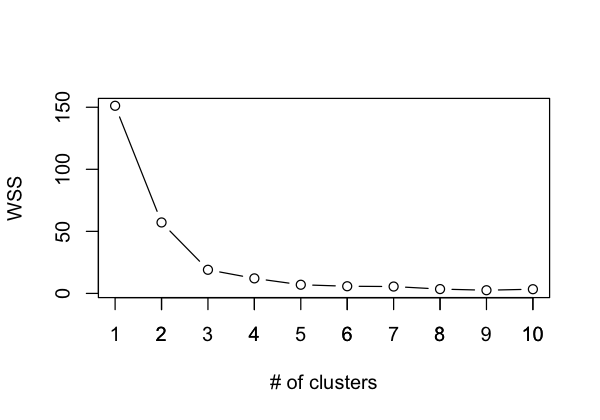

In [54]:
plot(1:10, wss, type = 'b', xlab = "# of clusters", ylab = "WSS")
axis(1, 1:10)

In [62]:
fit <- kmeans(fit_data$delta, 3)
fit

K-means clustering with 3 clusters of sizes 4, 30, 51

Cluster means:
       [,1]
1  5.775000
2  9.633667
3 11.154902

Clustering vector:
 [1] 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
[39] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[77] 3 3 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1]  1.196300 10.649497  7.198675
 (between_SS / total_SS =  87.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [63]:
map_data <- fit_data %>%
    mutate(cluster = factor(fit$cluster)) %>%
    mutate(label = if_else(label %in% names(rus_regions_mapping), rus_regions_mapping[label] , label)) %>%
    filter(!is.na(label))

map_data %<>%
    right_join(rus_map, by = c('label' = 'NL_NAME_1'))

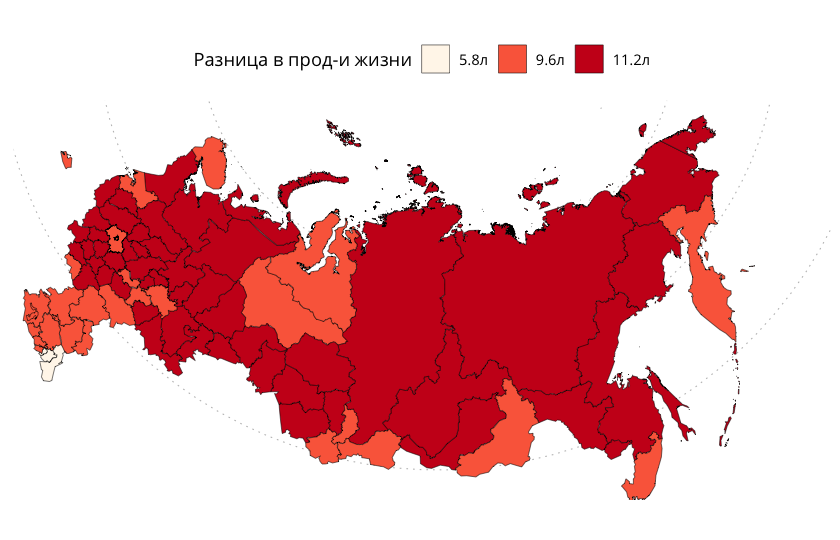

In [64]:
options(repr.plot.width = 7, repr.plot.height = 4.5)

ggplot(map_data, aes(long, lat, group = group, fill = cluster)) +
    geom_polygon(color = "black", size = .15) +
    coord_map(projection = "albers", parameters = c(52, 64), orientation = c(90,105,0), xlim = c(29, 172), ylim = c(47, 78)) +
    scale_fill_manual(values = c('#fff7ec', '#fb6a4a', '#cb181d'), labels = c('5.8л', '9.6л', '11.2л')) +
#     scale_fill_gradientn(colors = RColorBrewer::brewer.pal(n = 8, name = 'Reds')) +
#     scale_color_gradientn(colors = c(rep('black', 35), rep('white',9)), guide = F) +
#     scale_size_continuous(range = c(3,4), guide = F) +
    labs(fill = "Разница в прод-и жизни", x = NULL, y = NULL) +
    theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(),
          panel.border = element_blank(), panel.grid = element_line(size = .1),
          legend.position = 'top')